In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sb

In [2]:

df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

files = [df2015, df2016, df2017, df2018,df2019, df2020, df2021]

df = pd.concat(files, axis=0, ignore_index=True)

In [3]:
#Group time intervals

#Group by every 6 hour
df['time'] = pd.to_datetime(df['date_time']).dt.time
new_date = pd.to_datetime('2023-03-10')
df['date_time_2'] = pd.to_datetime(df['time'], format='%H:%M:%S').apply(lambda t: pd.Timestamp.combine(new_date, t.time()))
time_interval = '6H'

df['rounded_time'] = df['date_time_2'].dt.floor(time_interval)
df['group'] = df.groupby('rounded_time').ngroup().astype(str)

#Group for each hour
df['date_time_3'] = pd.to_datetime(df['date_time_2'], format='%H:%M:%S').apply(lambda t: pd.Timestamp(t.replace(minute=0, second=0)))
df['group_time'] = df.groupby('date_time_3').ngroup()

attack_df = df[df['attack'] == 1]
no_attack_df = df[df['attack'] == 0]




## Mean and std used in table

In [71]:
print("mean attack", attack_df['angle'].mean())
print("mean no attack", no_attack_df['angle'].mean())
print("-------")

print("attack std", attack_df['angle'].std())
print("no attack std", no_attack_df['angle'].std())



mean attack 103.03383097498657
mean no attack 96.70145113678726
-------
attack std 55.881343183795984
no attack std 57.95897223067411


## Comparison Trajectory angle

Kan sjå ut som det er litt ulikheter mellom attack og ikkje attack-data, men trur det er pga lite datapunkter i attackdataen

<AxesSubplot:xlabel='group', ylabel='angle'>

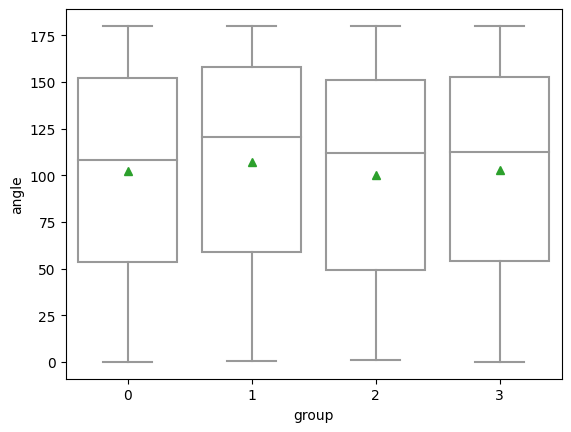

In [4]:
sb.boxplot(x="group", y='angle', data = attack_df, showfliers = False, showmeans=True, color="White")


<AxesSubplot:xlabel='group', ylabel='angle'>

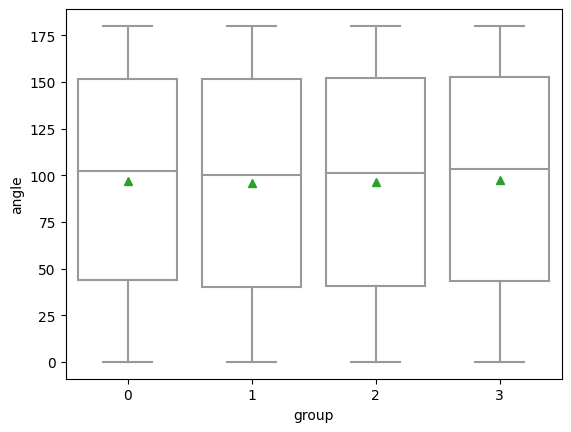

In [82]:
sb.boxplot(x="group", y='angle', data = no_attack_df, showmeans=True, color="White")


<AxesSubplot:xlabel='group_time', ylabel='angle'>

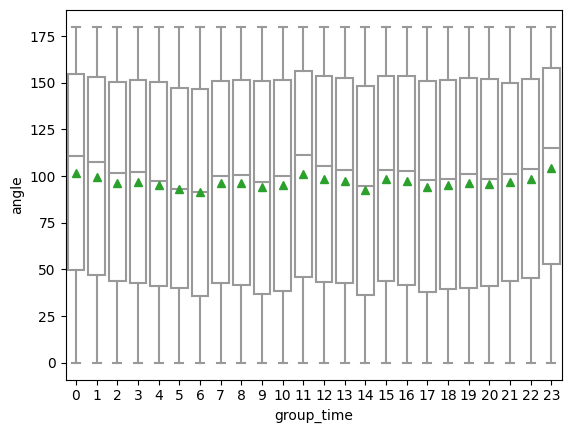

In [5]:
sb.boxplot(x="group_time", y='angle', data = no_attack_df, showmeans=True, color="White")


<AxesSubplot:xlabel='group_time', ylabel='angle'>

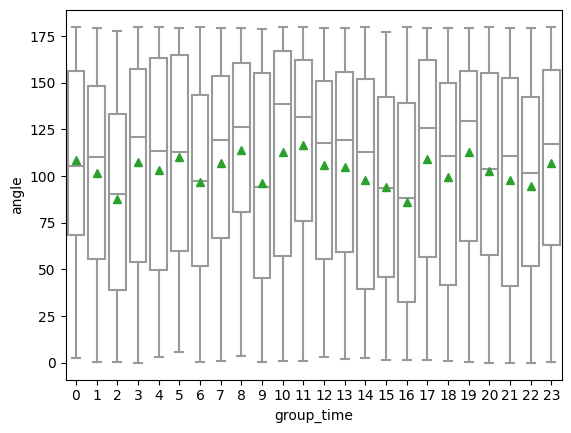

In [6]:
sb.boxplot(x="group_time", y='angle', data = attack_df, showmeans=True, color="White")


## Comparison Velocity

<AxesSubplot:xlabel='group_time', ylabel='velocity'>

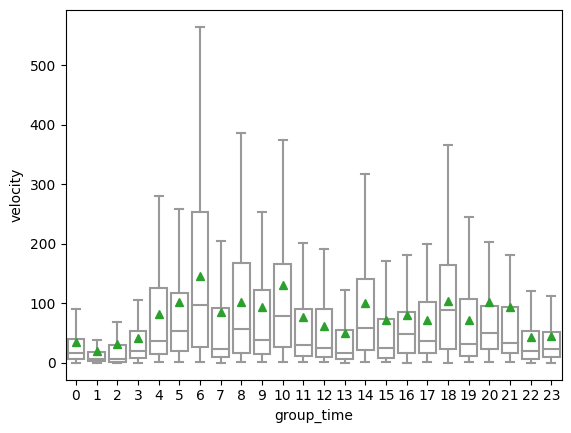

In [83]:
sb.boxplot(x="group_time", y='velocity', data = attack_df, showfliers = False, showmeans=True, color="White")


<AxesSubplot:xlabel='group_time', ylabel='velocity'>

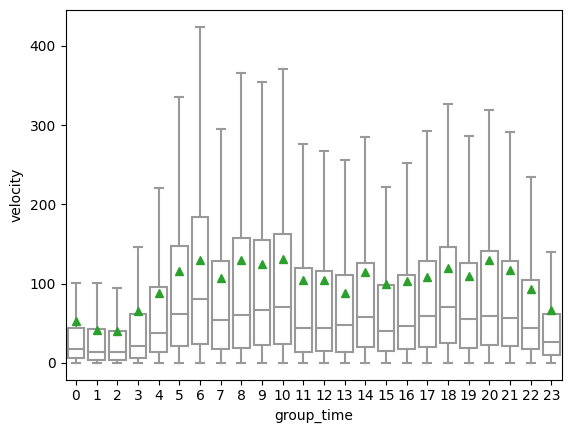

In [85]:
sb.boxplot(x="group_time", y='velocity', data = no_attack_df, showfliers = False, showmeans=True, color="White")




## Comparison Altitude

<AxesSubplot:xlabel='group_time', ylabel='altitude'>

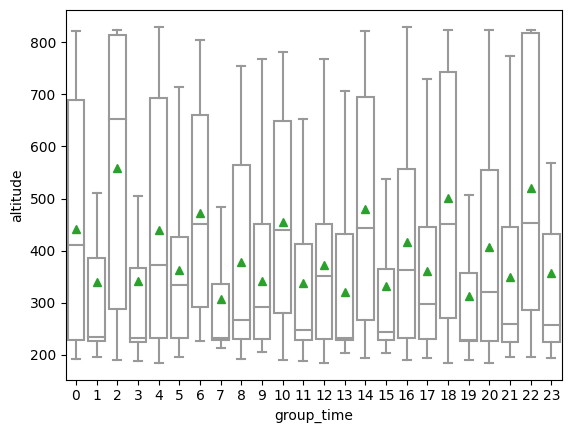

In [87]:
sb.boxplot(x="group_time", y='altitude', data = attack_df, showfliers = False, showmeans=True, color="White")


<AxesSubplot:xlabel='group_time', ylabel='altitude'>

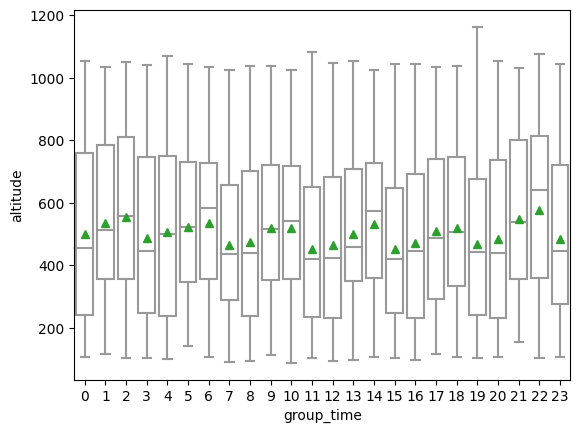

In [88]:
sb.boxplot(x="group_time", y='altitude', data = no_attack_df, showfliers = False, showmeans=True, color="White")


<AxesSubplot:xlabel='group', ylabel='altitude'>

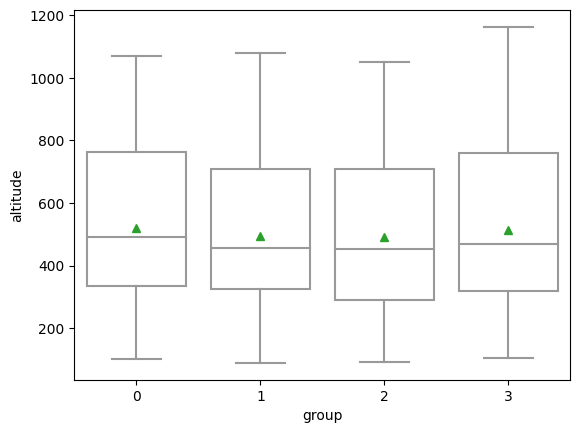

In [7]:
sb.boxplot(x="group", y='altitude', data = no_attack_df, showmeans=True, color="White")


<AxesSubplot:xlabel='group', ylabel='altitude'>

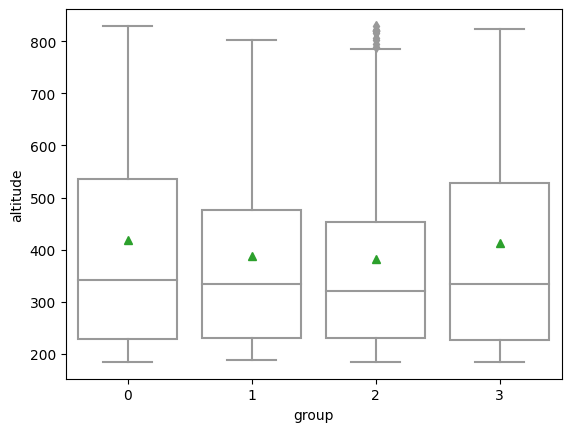

In [8]:
sb.boxplot(x="group", y='altitude', data = attack_df, showmeans=True, color="White")
